In [1]:
%matplotlib  inline
import numpy as np
import pandas as pd

import sklearn.datasets as datasets

from sklearn import preprocessing

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import euclidean

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from matplotlib import pyplot as plt
%config InlineBackend.rc={'figure.figsize': (12, 8)}

# Responder os itens a seguir desta mesma lista de exercícios.
## Use o dataset da Lista 12 para:
### Fazer clusterização hierárquica (HC) usando os seguintes métodos e mostrando os dendrogramas para:
#### Single
#### Complete
#### Average

In [2]:
pd.read_csv('datasets/data_1024.csv', delimiter='\t').head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [3]:
data = np.genfromtxt("datasets/data_1024.csv", delimiter="\t", skip_header=1)
X = data[:, 1:]

In [4]:
hc_single = linkage(X, method="single")
pd.DataFrame(hc_single, columns=['idx1', 'idx2', 'dist', 'single_count']).head()

,idx1,idx2,dist,single_count
0,118.0,212.0,0.0,2.0
1,989.0,3163.0,0.0,2.0
2,1055.0,1870.0,0.0,2.0
3,1190.0,1913.0,0.0,2.0
4,111.0,1650.0,0.0,2.0


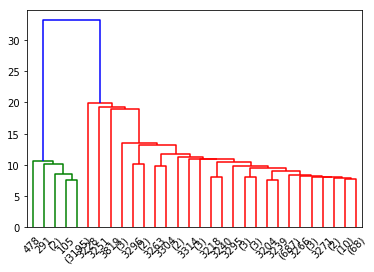

In [5]:
dendrogram(hc_single, truncate_mode='lastp')
plt.show()

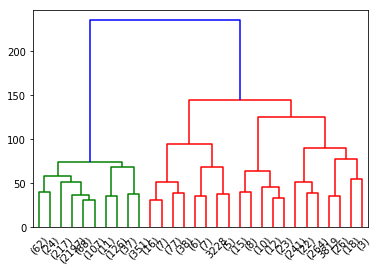

In [6]:
hc_complete = linkage(X, method="complete")

dendrogram(hc_complete, truncate_mode='lastp')
plt.show()

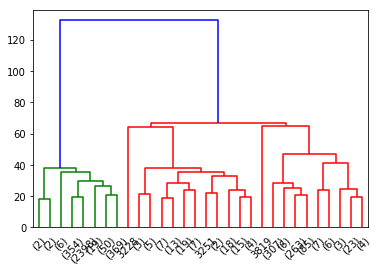

In [7]:
hc_average = linkage(X, method="average")

dendrogram(hc_average, truncate_mode='lastp')
plt.show()

## Escolher uma clusterização hierárquica do item 1 e, a partir dela, escolher uma linha de corte e mostrar os clusters no gráfico.

In [8]:
np.unique(cut_tree(hc_complete, n_clusters=8), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 525, 2675,   68,   19,   21,  138,  527,   27]))

## Fazer clusterização DBSCAN com diferentes valores de eps e minPoints.

[-1  0  1  2]


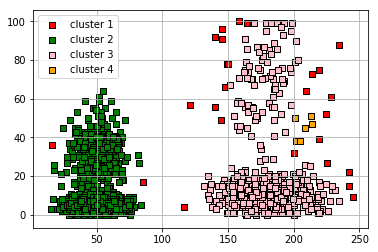

In [9]:
y_db1 = DBSCAN(eps=10, min_samples=5).fit_predict(X)
print(np.unique(y_db1))

plt.scatter(X[y_db1 == -1, 0],
            X[y_db1 == -1, 1],
            s=40, c='red',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db1 == 0, 0],
            X[y_db1 == 0, 1],
            s=40, c='green',
            marker='s', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_db1 == 1, 0],
            X[y_db1 == 1, 1],
            s=40, c='pink',
            marker='s', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_db1 == 2, 0],
            X[y_db1 == 2, 1],
            s=40, c='orange',
            marker='s', edgecolor='black',
            label='cluster 4')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

[-1  0  1]


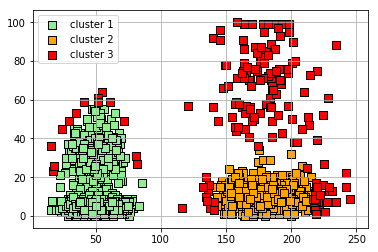

In [10]:
y_db2 = DBSCAN(eps=15, min_samples=200).fit_predict(X)
print(np.unique(y_db2))

plt.scatter(X[y_db2 == 0, 0],
            X[y_db2 == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db2 == 1, 0],
            X[y_db2 == 1, 1],
            s=50, c='orange',
            marker='s', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_db2 == -1, 0],
            X[y_db2 == -1, 1],
            s=50, c='red',
            marker='s', edgecolor='black',
            label='cluster 3')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

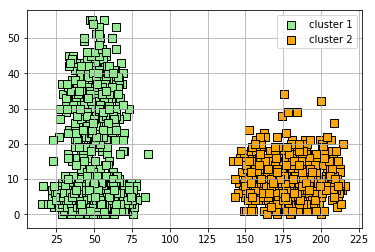

In [11]:
y_db3 = DBSCAN(eps=35, min_samples=50).fit_predict(X)
np.unique(y_db3)

plt.scatter(X[y_db2 == 0, 0],
            X[y_db2 == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db2 == 1, 0],
            X[y_db2 == 1, 1],
            s=50, c='orange',
            marker='s', edgecolor='black',
            label='cluster 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

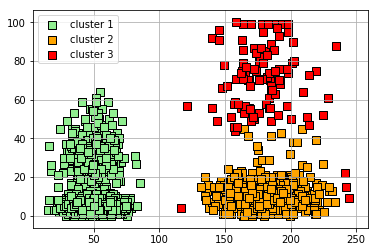

In [12]:
y_db4 = DBSCAN(eps=20, min_samples=100).fit_predict(X)
np.unique(y_db4)

plt.scatter(X[y_db4 == 0, 0],
            X[y_db4 == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db4 == 1, 0],
            X[y_db4 == 1, 1],
            s=50, c='orange',
            marker='s', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_db4 == -1, 0],
            X[y_db4 == -1, 1],
            s=50, c='red',
            marker='s', edgecolor='black',
            label='cluster 3')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Questões conceituais:
### Quais as diferenças entre feature selection e feature extraction? 
### Dê exemplos de técnicas usadas para feature selection.
### Dê exemplos de técnicas usadas para feature extraction. 

Feature Selection: Essa técnica é usada para selecionar e remover recursos desnecessários do dataset, isso é feito antes do modelo ser executado. Isso pode ser feito por varias técnicas, como: Regressão Linear, Árvores de Decisão, cálculo de pesos de importância, entre outras.

Feature Extraction: Essa técnica é uma transformação feita nos dados com o proposito de melhorar a precisão do algoritmo, por exemplo, uma data com dia/mês/ano em muitos casos é melhor para o algoritmo se isso fosse transformado apenas no dia, mês ou no ano. Essa técnica está relacionada a redução de dimensionalidade. Técnicas gerais de redução de dimensionalidade são usadas, como: Redução de dimensionalidade multifatorial, Redução de dimensionalidade não linear, PCA do kernel, entre outras.

## Use o iris dataset e a partir dele:

In [13]:
iris = datasets.load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

std_scale = preprocessing.StandardScaler().fit(X_iris)
X_std = std_scale.transform(X_iris)

### Reduza a dimensionalidade para 2 dimensões usando PCA, e  mostre os pontos em um gráfico, onde cada classe é visualizada com uma cor diferente. 

[ 0.72770452  0.23030523]


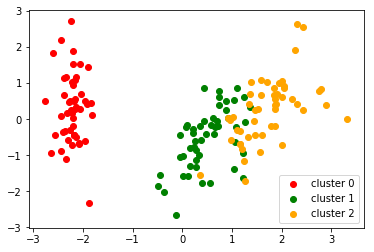

In [14]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_std))
print(pca.explained_variance_ratio_)

unique_labels = set(y_iris)
colors = ['red', 'green', 'orange']

for k, col in zip(unique_labels, colors):
    plt.scatter(X_pca[y_iris == k][0], X_pca[y_iris == k][1], c=col, label='cluster {}'.format(k))

plt.legend()
plt.show()

### Reduza a dimensionalidade para 2 dimensões usando LDA, e  mostre os pontos em um gráfico, onde cada classe é visualizada com uma cor diferente. 

[ 0.99147248  0.00852752]


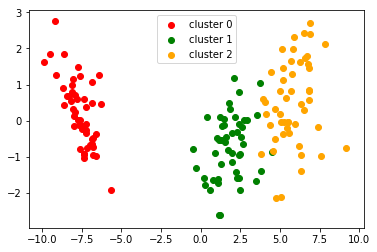

In [15]:
lda = LDA(n_components=2)
X_lda = pd.DataFrame(lda.fit_transform(X_std, y_iris))
print(lda.explained_variance_ratio_)

unique_labels = set(y_iris)
colors = ['red', 'green', 'orange']

for k, col in zip(unique_labels, colors):
    plt.scatter(X_lda[y_iris == k][0], X_lda[y_iris == k][1], c=col, label='cluster {}'.format(k))

plt.legend()
plt.show()